In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.preprocessing import scale, LabelEncoder

In [54]:
from lightgbm import LGBMClassifier
import lightgbm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [4]:
ls

 application_test.csv             Data_Exploration.ipynb     Untitled.ipynb
 application_train.csv            full.csv
 Data_Exploration_FullSet.ipynb  'Model Performance.ipynb'


In [5]:
dataset = pd.read_csv("application_train.csv")

In [6]:
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
dataset.shape

(307511, 122)

In [8]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Get  columns whose data type is object i.e. string
filteredColumns = dataset.dtypes[dataset.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

# Label Encoding if there are two categorical labels on a feature)
for col in listOfColumnNames:
    if dataset.dtypes[col] == np.object:
        # If 2 or fewer unique categories
        if len(list(dataset[col].unique())) <= 2:
            # Train on the training data
            le.fit(dataset[col])
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

# One-Hot Encoding (> 2 categorical labels for a feature)
num_dataset = pd.get_dummies(dataset)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
3 columns were label encoded.


In [9]:
null_rows = num_dataset[num_dataset.isnull().any(axis=1)]
null_rows

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,0,0,1,0,1,0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,0,0,1,0,1,0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,0,1,0,0,1,0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0,0,1,0,1,0


In [10]:
null_rows.shape

(296160, 246)

In [11]:
null_rows.shape[0]/dataset.shape[0]

0.9630874993089678

In [12]:
dataset.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [13]:
num_dataset.shape

(307511, 246)

In [14]:
num_dataset.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(num_dataset.drop('TARGET', 1), 
                                    num_dataset['TARGET'], test_size = .2, random_state=42,shuffle=True)

In [19]:
sum_1 = sum(y_train==1)
sum_0 = sum(y_train==0)
total = sum_0+sum_1

In [21]:
scale_pos_weight = (sum_0/sum_1)
scale_pos_weight

11.377138257194607

In [26]:
train_data = lightgbm.Dataset(X_train)

In [27]:
test_data = lightgbm.Dataset(X_test)

In [58]:
parameters = {
    'is_unbalance': 'true',
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

In [59]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 1
[3]	valid_0's auc: 1
[4]	valid_0's auc: 1
[5]	valid_0's auc: 1
[6]	valid_0's auc: 1
[7]	valid_0's auc: 1
[8]	valid_0's auc: 1
[9]	valid_0's auc: 1
[10]	valid_0's auc: 1
[11]	valid_0's auc: 1
[12]	valid_0's auc: 1
[13]	valid_0's auc: 1
[14]	valid_0's auc: 1
[15]	valid_0's auc: 1
[16]	valid_0's auc: 1
[17]	valid_0's auc: 1
[18]	valid_0's auc: 1
[19]	valid_0's auc: 1
[20]	valid_0's auc: 1
[21]	valid_0's auc: 1
[22]	valid_0's auc: 1
[23]	valid_0's auc: 1
[24]	valid_0's auc: 1
[25]	valid_0's auc: 1
[26]	valid_0's auc: 1
[27]	valid_0's auc: 1
[28]	valid_0's auc: 1
[29]	valid_0's auc: 1
[30]	valid_0's auc: 1
[31]	valid_0's auc: 1
[32]	valid_0's auc: 1
[33]	valid_0's auc: 1
[34]	valid_0's auc: 1
[35]	valid_0's auc: 1
[36]	valid_0's auc: 1
[37]	valid_0's auc: 1
[38]	valid_0's auc: 1
[39]	valid_0's auc: 1
[40]	valid_0's auc: 1
[41]	valid_0's auc: 1
[42]	valid_0's auc: 1
[43]	valid_0's auc: 1
[

In [60]:
y_pred=model.predict(X_test)

In [61]:
predictedLabels = (y_pred>0.35).astype(int)

In [62]:
print ("\naccuracy_score :",accuracy_score(y_test,predictedLabels))
print ("\nclassification report :\n",(classification_report(y_test,predictedLabels)))


accuracy_score : 0.9195323805342829

classification report :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



/home/liyam/anaconda3/envs/SENG474_Project/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
confusion_matrix(y_test,predictedLabels)

array([[56554,     0],
       [ 4949,     0]])

In [56]:
roc_score_xgb = roc_auc_score(y_test, y_pred)
roc_score_xgb

0.5

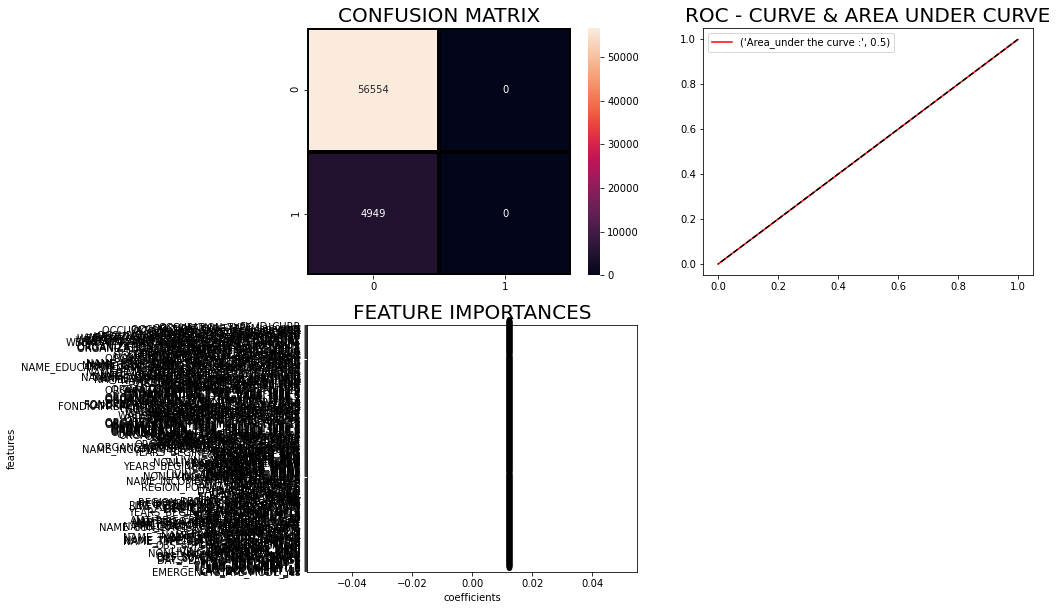

In [52]:
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,predictedLabels),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)
predicting_probabilites = y_pred
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)    
dataframe = pd.DataFrame(model.feature_importance(),X_train.columns).reset_index()
dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
dataframe = dataframe.sort_values(by="coefficients",ascending = False)
plt.subplot(223)
ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
plt.title("FEATURE IMPORTANCES",fontsize =20)
for i,j in enumerate(dataframe["coefficients"]):
    ax.text(.011,i,j,weight = "bold")
plt.show()